In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os as os
import missingno as msno
from scipy import stats

pd.set_option('display.max_columns', 100)
pd.set_option("display.max_columns", 100)

import warnings
warnings.simplefilter(action='ignore',)

In [159]:
fire_df = pd.read_csv('../data/WFIGS_-_Wildland_Fire_Locations_Full_History.csv')

In [160]:
fire_df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,EstimatedCostToDate,FinalFireReportApprovedByTitle,FinalFireReportApprovedByUnit,FinalFireReportApprovedDate,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireCode,FireDepartmentID,FireDiscoveryDateTime,FireMgmtComplexity,FireOutDateTime,FireStrategyConfinePercent,FireStrategyFullSuppPercent,FireStrategyMonitorPercent,FireStrategyPointZonePercent,FSJobCode,FSOverrideCode,GACC,ICS209ReportDateTime,ICS209ReportForTimePeriodFrom,ICS209ReportForTimePeriodTo,ICS209ReportStatus,IncidentManagementOrganization,IncidentName,IncidentShortDescription,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,InitialResponseDateTime,IrwinID,IsFireCauseInvestigated,IsFireCodeRequested,IsFSAssisted,IsMultiJurisdictional,IsReimbursable,IsTrespass,IsUnifiedCommand,LocalIncidentIdentifier,PercentContained,PercentPerimeterToBeContained,POOCity,POOCounty,POODispatchCenterID,POOFips,POOJurisdictionalAgency,POOJurisdictionalUnit,POOJurisdictionalUnitParentUnit,POOLandownerCategory,POOLandownerKind,POOLegalDescPrincipalMeridian,POOLegalDescQtr,POOLegalDescQtrQtr,POOLegalDescRange,POOLegalDescSection,POOLegalDescTownship,POOPredictiveServiceAreaID,POOProtectingAgency,POOProtectingUnit,POOState,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,SecondaryFuelModel,TotalIncidentPersonnel,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
0,-105.563067,44.603340,96806,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,WYCPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M8FR,NaN,2003/01/01 06:59:59+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RMCC,NaN,NaN,NaN,NaN,NaN,SCHWARTZ,NaN,WF,FI,NaN,NaN,NaN,NaN,{0E39221D-E02A-49DC-9AD9-80940335F306},NaN,0,1.0,0.0,0.0,0.0,NaN,200237,NaN,NaN,NaN,Campbell,WYCPC,56005.0,NaN,NaN,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,RM05,C&L,WYCMX,US-WY,NaN,NaN,NaN,NaN,NaN,2003-WYCMX-200237,No Decision,firecode,firecode,0,NaN,NaN,2020/07/04 16:03:32+00,2020/07/05 19:00:30+00,IRWIN,{417AF618-E9C0-44C5-9826-852552428E4F},NaN,NaN,NaN
1,-117.076679,34.733894,165266,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,CASBCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A655,NaN,2004/07/06 01:04:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,NaN,NaN,NaN,NaN,NaN,MENTONE,NaN,WF,FI,NaN,NaN,NaN,NaN,{AAA525F6-07F5-416E-BD1D-86A31CB06BBF},NaN,0,1.0,0.0,0.0,0.0,NaN,6784,NaN,NaN,NaN,San Bernardino,CASBCC,6071.0,BLM,CACDD,NaN,BLM,Federal,NaN,NaN,NaN,NaN,NaN,NaN,SC14,CDF,CABDU,US-CA,NaN,NaN,NaN,NaN,NaN,2004-CABDU-006784,No Decision,firecode,wfdss,0,NaN,NaN,2020/10/13 01:01:00+00,2020/10/13 01:01:41+00,IRWIN,{33BBF775-FC39-4BBB-BE09-5F127846F796},NaN,NaN,NaN
2,-116.216680,43.666673,138626,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,IDBDC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EC4U,NaN,2008/07/22 15:10:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBCC,NaN,NaN,NaN,NaN,NaN,NIFC RAMP SUPPORT,NaN,WF,FI,NaN,NaN,NaN,NaN,{4BE0579D-0D0B-4260-ADA8-E3EB5B057582},NaN,0,1.0,0.0,0.0,0.0,NaN,2,NaN,NaN,NaN,Ada,IDBDC,16001.0,BLM,IDBOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GB04,NaN,IDGBK,US-ID,NaN,NaN,NaN,NaN,NaN,2008-IDGBK-000002,No Decision,firecode,firecode,0,NaN,NaN,2019/08/05 14:33:55+00,2019/08/05 14:33:55+00,IRWIN,{936273F9-875B-47BC-9653-B86CF51D6A92},NaN,NaN,NaN
3,-111.426912,42.096336,165226,NaN,DEFAULT,NaN,NaN,NaN,20.0,1.0,IDEIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,2008/09/08 13:34:59+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBCC,NaN,NaN,NaN,NaN,NaN,St. Charles RX,NaN,RX,FI,42.103889,-111.547778,NaN,NaN,{A90929F6-96A3-4AE1-A388-E029CD829D52},NaN,0,0.0,0.0,0.0,0.0,NaN,8902,NaN,NaN,NaN,Bear Lake,IDEIC,16007.0,FS,NaN,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,GB09,FS,IDCTF,US-ID,NaN

In [161]:
fire_df.shape

(214578, 96)

In [162]:
#Looking at % of missing values
fire_df.isnull().sum()/(len(fire_df))

X                     0.000000
Y                     0.000000
OBJECTID              0.000000
ABCDMisc              0.949972
ADSPermissionState    0.000000
                        ...   
Source                0.000000
GlobalID              0.000000
IsCpxChild            0.939029
CpxName               0.997716
CpxID                 0.997716
Length: 96, dtype: float64

In [163]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214578 entries, 0 to 214577
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   X                                214578 non-null  float64
 1   Y                                214578 non-null  float64
 2   OBJECTID                         214578 non-null  int64  
 3   ABCDMisc                         10735 non-null   object 
 4   ADSPermissionState               214578 non-null  object 
 5   CalculatedAcres                  4863 non-null    float64
 6   ContainmentDateTime              128713 non-null  object 
 7   ControlDateTime                  117513 non-null  object 
 8   DailyAcres                       146738 non-null  float64
 9   DiscoveryAcres                   154222 non-null  float64
 10  DispatchCenterID                 177199 non-null  object 
 11  EstimatedCostToDate              13477 non-null   float64
 12  Fi

In [164]:
#Dropping columns that had 35% or more of their values missing
fire_df.dropna(axis = 'columns', thresh = 140_000, inplace = True)

In [165]:
#Rechecking shape
#Went from 96 to 39 features
fire_df.shape

(214578, 39)

## Dictionary for columns dropped based on null value percentage

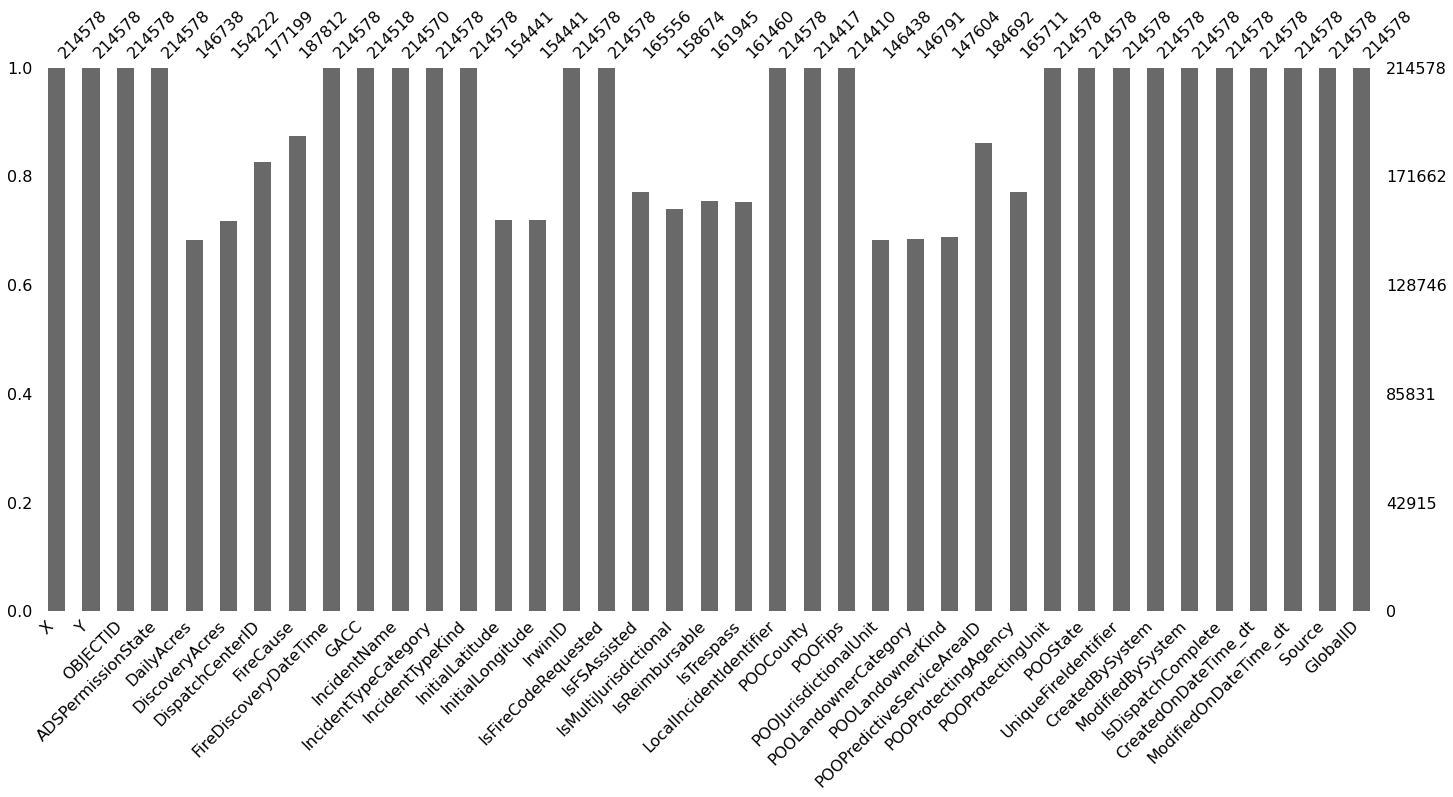

In [166]:
#Visualizing remaing column na's
msno.bar(fire_df);

In [167]:
#Looked at definition of each column to determine whether or not they were needed
fire_df.drop(columns = ['ADSPermissionState', 'DispatchCenterID', 'InitialLatitude', 
                        'InitialLongitude', 'IrwinID', 'IsTrespass', 'POOFips', 
                          'POOPredictiveServiceAreaID', 
                        'POOProtectingAgency', 'POOProtectingUnit', 'ModifiedBySystem', 
                        'IsDispatchComplete', 'Source', 'GlobalID', 'POOJurisdictionalUnit', 
                        'POOLandownerCategory', 'POOLandownerKind', 'IsReimbursable', 'IsMultiJurisdictional',
                       'IncidentTypeKind', 'IncidentTypeCategory', 'OBJECTID', 'GACC', 'LocalIncidentIdentifier',
                       'CreatedOnDateTime_dt', 'CreatedBySystem', 'ModifiedOnDateTime_dt', 'DiscoveryAcres', 'IsFireCodeRequested'], inplace = True)

## Dictionary for values dropped 
- 

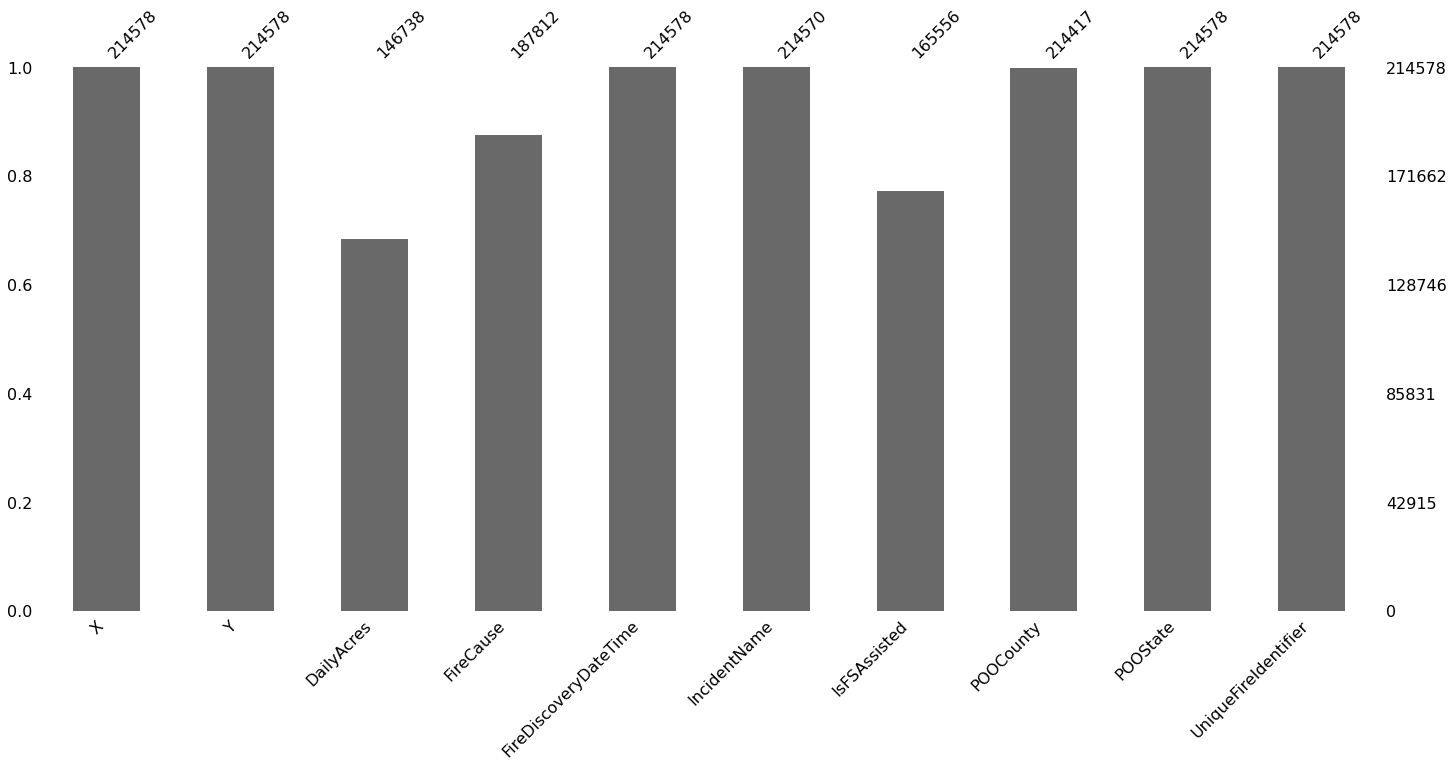

In [168]:
#Visualizing remaing column na's
msno.bar(fire_df);

In [169]:
# Trimming state columns down to just the stat abbreviation
fire_df['POOState'] = fire_df['POOState'].map(lambda x: x.strip('US-'))
fire_df.head()

,X,Y,DailyAcres,FireCause,FireDiscoveryDateTime,IncidentName,IsFSAssisted,POOCounty,POOState,UniqueFireIdentifier
0,-105.563067,44.603340,NaN,NaN,2003/01/01 06:59:59+00,SCHWARTZ,1.0,Campbell,WY,2003-WYCMX-200237
1,-117.076679,34.733894,NaN,NaN,2004/07/06 01:04:00+00,MENTONE,1.0,San Bernardino,CA,2004-CABDU-006784
2,-116.216680,43.666673,NaN,NaN,2008/07/22 15:10:00+00,NIFC RAMP SUPPORT,1.0,Ada,ID,2008-IDGBK-000002
3,-111.426912,42.096336,20.0,Unknown,2008/09/08 13:34:59+00,St. Charles RX,0.0,Bear Lake,ID,2008-IDCTF-008902
4,-112.072414,34.598306,NaN,Unknown,2008/10/07 18:16:00+00,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008-AZPNF-000975


In [170]:
# Fixing South Dakotas state abbreviations to be SD instead of just D
fire_df['POOState'] = fire_df['POOState'].map(lambda x: 'SD' if x == 'D' else x)

In [171]:
# fire_df = fire_df.groupby('UniqueFireIdentifier').apply(lambda x: x.ffill().bfill()).drop_duplicates(keep='last', subset=['UniqueFireIdentifier'])
# fire_df

In [172]:
fire_df = fire_df.rename(columns = {'X': 'lattitude', 'Y': 'longitude','FireCause': 'fire_cause',
                                    'DailyAcres': 'acres_burned', 'FireDiscoveryDateTime': 'fire_discovery_dt', 
                                   'IncidentName': 'incident_name', 'isFSAssisted': 'is_fs_assisted', 'POOCounty': 'origin_county',
                                    'POOState': 'origin_state', 'UniqueFireIdentifier': 'unique_fire_identifier'})

In [173]:
fire_df.head()

,lattitude,longitude,acres_burned,fire_cause,fire_discovery_dt,incident_name,IsFSAssisted,origin_county,origin_state,unique_fire_identifier
0,-105.563067,44.603340,NaN,NaN,2003/01/01 06:59:59+00,SCHWARTZ,1.0,Campbell,WY,2003-WYCMX-200237
1,-117.076679,34.733894,NaN,NaN,2004/07/06 01:04:00+00,MENTONE,1.0,San Bernardino,CA,2004-CABDU-006784
2,-116.216680,43.666673,NaN,NaN,2008/07/22 15:10:00+00,NIFC RAMP SUPPORT,1.0,Ada,ID,2008-IDGBK-000002
3,-111.426912,42.096336,20.0,Unknown,2008/09/08 13:34:59+00,St. Charles RX,0.0,Bear Lake,ID,2008-IDCTF-008902
4,-112.072414,34.598306,NaN,Unknown,2008/10/07 18:16:00+00,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008-AZPNF-000975


In [174]:
fire_df.dtypes

lattitude                 float64
longitude                 float64
acres_burned              float64
fire_cause                 object
fire_discovery_dt          object
incident_name              object
IsFSAssisted              float64
origin_county              object
origin_state               object
unique_fire_identifier     object
dtype: object

In [175]:
# Creating new column for the year the fire was created
fire_df['fire_discovery_year'] = fire_df['fire_discovery_dt'].map(lambda x: x[:4])

In [176]:
#creating new column for the month the fire was created
fire_df['fire_discovery_month'] = fire_df['fire_discovery_dt'].map(lambda x: x[5:7])

In [177]:
fire_df.head()

,lattitude,longitude,acres_burned,fire_cause,fire_discovery_dt,incident_name,IsFSAssisted,origin_county,origin_state,unique_fire_identifier,fire_discovery_year,fire_discovery_month
0,-105.563067,44.603340,NaN,NaN,2003/01/01 06:59:59+00,SCHWARTZ,1.0,Campbell,WY,2003-WYCMX-200237,2003,01
1,-117.076679,34.733894,NaN,NaN,2004/07/06 01:04:00+00,MENTONE,1.0,San Bernardino,CA,2004-CABDU-006784,2004,07
2,-116.216680,43.666673,NaN,NaN,2008/07/22 15:10:00+00,NIFC RAMP SUPPORT,1.0,Ada,ID,2008-IDGBK-000002,2008,07
3,-111.426912,42.096336,20.0,Unknown,2008/09/08 13:34:59+00,St. Charles RX,0.0,Bear Lake,ID,2008-IDCTF-008902,2008,09
4,-112.072414,34.598306,NaN,Unknown,2008/10/07 18:16:00+00,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008-AZPNF-000975,2008,10


In [178]:
#Replacing NaN values for fire cause with Unknown 
fire_df['fire_cause'] = fire_df['fire_cause'].fillna('Unknown')

In [179]:
fire_df.head()

,lattitude,longitude,acres_burned,fire_cause,fire_discovery_dt,incident_name,IsFSAssisted,origin_county,origin_state,unique_fire_identifier,fire_discovery_year,fire_discovery_month
0,-105.563067,44.603340,NaN,Unknown,2003/01/01 06:59:59+00,SCHWARTZ,1.0,Campbell,WY,2003-WYCMX-200237,2003,01
1,-117.076679,34.733894,NaN,Unknown,2004/07/06 01:04:00+00,MENTONE,1.0,San Bernardino,CA,2004-CABDU-006784,2004,07
2,-116.216680,43.666673,NaN,Unknown,2008/07/22 15:10:00+00,NIFC RAMP SUPPORT,1.0,Ada,ID,2008-IDGBK-000002,2008,07
3,-111.426912,42.096336,20.0,Unknown,2008/09/08 13:34:59+00,St. Charles RX,0.0,Bear Lake,ID,2008-IDCTF-008902,2008,09
4,-112.072414,34.598306,NaN,Unknown,2008/10/07 18:16:00+00,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008-AZPNF-000975,2008,10


In [180]:
fire_df['fire_cause'].isnull().sum()

0

In [182]:
#Identifying duplicate fire entries
fire_df[fire_df['unique_fire_identifier'].duplicated(keep=False)]

,lattitude,longitude,acres_burned,fire_cause,fire_discovery_dt,incident_name,IsFSAssisted,origin_county,origin_state,unique_fire_identifier,fire_discovery_year,fire_discovery_month
442,-86.914106,45.921409,0.1,Human,2014/05/24 15:43:59+00,Road fire,NaN,Delta,MI,2014-MIHIF-000005,2014,05
542,-88.449706,45.258308,NaN,Unknown,2014/05/26 18:00:00+00,SNOW FALLS,0.0,Oconto,WI,2014-WICNF-140010,2014,05
543,-88.444706,45.252208,110.0,Human,2014/05/26 18:00:00+00,SNOW FALLS,0.0,Oconto,WI,2014-WICNF-140010,2014,05
565,-120.237013,37.657205,677.0,Undetermined,2014/05/26 22:30:00+00,Hunter,NaN,Mariposa,CA,2014-CAMMU-008974,2014,05
567,-120.142013,37.568905,NaN,Unknown,2014/05/26 22:36:00+00,HUNTER,1.0,Mariposa,CA,2014-CAMMU-008974,2014,05
...,...,...,...,...,...,...,...,...,...,...,...,...
201640,-99.441120,44.056396,NaN,Unknown,2021/09/26 00:14:59+00,PETRO,0.0,Buffalo,SD,2021-SDCCA-000086,2021,09
204144,-121.091826,35.574127,NaN,Undetermined,2021/10/28 19:12:05+00,BRIDGE,0.0,San Luis Obispo,CA,2021-CASLU-015681,2021,10
204145,-121.091826,35.574127,NaN,Undetermined,2021/10/28 19:12:05+00,BRIDGE,0.0,San Luis Obispo,CA,2021-CASLU-015681,2021,10
204414,-102.529455,48.993897,NaN,Unknown,2021/11/03 13:10:00+00,MOE,0.0,Burke,ND,2021-NDFBA-000110,2021,11


In [183]:
fire_df['origin_state'].value_counts().sort_values(ascending = True)

MX-CH        1
CA-YT        1
MX-CA        1
MX-SO        1
CA-SK        2
         ...  
WA       10988
OR       14237
MT       14951
AZ       15829
CA       47809
Name: origin_state, Length: 62, dtype: int64

In [184]:
fire_df['acres_burned'].isnull().sum()

67840

In [185]:
# grabbing the average acres burned by month for each state and putting into dictionary
x = dict(fire_df.groupby(['origin_state', 'fire_discovery_month'])['acres_burned'].mean())
# Finding all observations where acres burned is null and putting them into a list
nan_list = list(fire_df.loc[fire_df['acres_burned'].isnull()].index)


#Looping through all rows where acres_burned is null and replacing with the states average acres burned for that particular month
for i in nan_list:
    # Grabbing the stat of a particular index from the nan list
    state = fire_df.loc[i].origin_state
    # Grabbing month of a particular index from the nan list
    month = fire_df.loc[i].fire_discovery_month
    # Grabbing the average acres burned for the state and month that was retrieved above
    acres_burned = x.get((str(state),month))
    # Filling nan value with that states average acres burned for that particular month
    fire_df.at[i, 'acres_burned'] = acres_burned  

In [186]:
fire_df['acres_burned'].isnull().sum()

28

In [189]:
# Dropping the remaining 28 observations that didn't get filled in 
nan_list = list(fire_df.loc[fire_df['acres_burned'].isnull()].index)
fire_df.drop(nan_list, inplace = True)

In [190]:
fire_df['acres_burned'].isnull().sum()

0

In [ ]:
# fire_df['acres_burned'].apply(acre_imputer)